### Author: Sangeeths Chandrakunmar

### Tree-Regression Model

### Import Libraries

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Importiere verarbeitete Daten

In [2]:
file_path = 'ds_salaries.csv'
ds_salaries = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Data Cleaning and Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


ds_salaries_cleaned = ds_salaries.drop(['salary', 'salary_currency'], axis=1)


categorical_cols = ds_salaries_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_cols = ds_salaries_cleaned.select_dtypes(include=['int64', 'float64']).columns.drop('salary_in_usd')


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = ds_salaries_cleaned.drop('salary_in_usd', axis=1)
y = ds_salaries_cleaned['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Training

In [4]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', DecisionTreeRegressor())])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3083471743.0305934, 0.2772913796509626)

### Model Evaluation

In [5]:
# Evaluating the model's performance on both the training and testing sets to check for overfitting
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculating MSE and R2 for both sets
mse_train = mean_squared_error(y_train, train_pred)
r2_train = r2_score(y_train, train_pred)

mse_test = mean_squared_error(y_test, test_pred)
r2_test = r2_score(y_test, test_pred)

(mse_train, r2_train, mse_test, r2_test)

(1546327359.2488985,
 0.6030236626754477,
 3083471743.0305934,
 0.2772913796509626)

### Pruning

In [6]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_transformed, y_train)

path = regressor.cost_complexity_pruning_path(X_train_transformed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas, impurities


(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.08921438e-01,
        1.69790280e+00, 1.84921458e+00, 2.43691744e+00, 2.78384376e+00,
        3.79510652e+00, 1.63196016e+01, 1.65154794e+01, 2.08581891e+01,
        2.44156125e+01, 5.67669774e+01, 6.15286285e+01, 7.31639481e+01,
        7.62864514e+01, 8.39380826e+01, 9.53809920e+01, 9.97130493e+01,
        1.08588604e+02, 1.16007324e+02, 1.22844208e+02, 1.40878828e+02,
        1.50532790e+02, 1.63755215e+02, 1.70654389e+02, 1.77180959e+02,
        2.31365013e+02, 2.34494929e+02, 2.77407901e+02, 4.18695822e+02,
        4.29401021e+02, 4.51915002e+02, 4.65310253e+02, 4.74820406e+02,
        4.88071801e+02, 5.01613848e+02, 5.04447736e+02, 5.12738571e+02,
        5.62290945e+02, 5.76830892e+02, 6.05936085e+02, 6.06026687e+02,
        6.33816278e+02, 6.65778961e+02, 6.65778961e+02, 6.65778961e+02,
        6.65778961e+02, 6.72504001e+02, 6.84551265e+02, 7.36120007e+02,
        7.49001332e+02, 8.03396971e+02, 8.24493013e+02, 9.843675

In [7]:
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.08921438e-01,
       1.69790280e+00, 1.84921458e+00, 2.43691744e+00, 2.78384376e+00,
       3.79510652e+00, 1.63196016e+01, 1.65154794e+01, 2.08581891e+01,
       2.44156125e+01, 5.67669774e+01, 6.15286285e+01, 7.31639481e+01,
       7.62864514e+01, 8.39380826e+01, 9.53809920e+01, 9.97130493e+01,
       1.08588604e+02, 1.16007324e+02, 1.22844208e+02, 1.40878828e+02,
       1.50532790e+02, 1.63755215e+02, 1.70654389e+02, 1.77180959e+02,
       2.31365013e+02, 2.34494929e+02, 2.77407901e+02, 4.18695822e+02,
       4.29401021e+02, 4.51915002e+02, 4.65310253e+02, 4.74820406e+02,
       4.88071801e+02, 5.01613848e+02, 5.04447736e+02, 5.12738571e+02,
       5.62290945e+02, 5.76830892e+02, 6.05936085e+02, 6.06026687e+02,
       6.33816278e+02, 6.65778961e+02, 6.65778961e+02, 6.65778961e+02,
       6.65778961e+02, 6.72504001e+02, 6.84551265e+02, 7.36120007e+02,
       7.49001332e+02, 8.03396971e+02, 8.24493013e+02, 9.84367510e+02,
      

### Pruning Plot

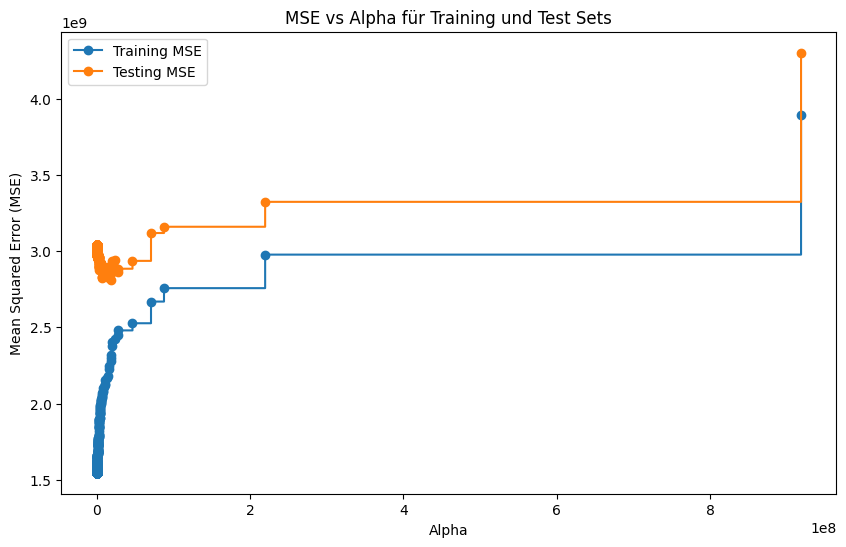

In [8]:
import matplotlib.pyplot as plt

# Training decision trees with different alpha values and evaluating their performance
mse_train_list = []
mse_test_list = []

for alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    regressor.fit(X_train_transformed, y_train)

    y_train_pred = regressor.predict(X_train_transformed)
    y_test_pred = regressor.predict(X_test_transformed)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plotting the MSE for training and testing sets against ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train_list, marker='o', label='Training MSE', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test_list, marker='o', label='Testing MSE', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Alpha für Training und Test Sets')
plt.legend()
plt.show()


### Optimal Tree Depth

In [9]:
# Finding the alpha value with the minimum MSE for the test set
optimal_alpha = ccp_alphas[mse_test_list.index(min(mse_test_list))]

optimal_regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=optimal_alpha)
optimal_regressor.fit(X_train_transformed, y_train)

y_train_pred_final = optimal_regressor.predict(X_train_transformed)
y_test_pred_final = optimal_regressor.predict(X_test_transformed)

mse_train_final = mean_squared_error(y_train, y_train_pred_final)
r2_train_final = r2_score(y_train, y_train_pred_final)

mse_test_final = mean_squared_error(y_test, y_test_pred_final)
r2_test_final = r2_score(y_test, y_test_pred_final)

optimal_alpha, (mse_train_final, r2_train_final, mse_test_final, r2_test_final)

(18800778.739410073,
 (2281240721.7363863,
  0.41435519403187204,
  2811705057.631406,
  0.34098845315442783))